In [118]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [120]:
title = 'History of the United States of America'
tit='Hist' #short title for future reference if needed
author = 'Henry Adams'
url = 'https://www.gutenberg.org/cache/epub/72667/pg72667.txt'
path = my_path

In [121]:
import os
import urllib.request  # Import the module required for making HTTP requests



# Check if the file is stored locally
filename = my_path + title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
    print("{title} file already exists".format(title=title))
    with open(filename, 'r') as f:
        raw = f.read()
else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = urllib.request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)


History of the United States of America file does not already exist. Grabbing from Project Gutenberg
Saving History of the United States of America file


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [122]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters: The Project Gutenberg eBook of History of the United States of America, Volume 3 (of 9)
    
This 
last 100 characters: roduce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.





In [123]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [124]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
all_tokens=word_tokenize(raw)#.lower())

In [127]:
all_tokens[60:80]

['under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 '.',
 'If',
 'you',
 'are']

In [129]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [130]:
clean_tokens[60:80]

['included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 'you',
 'will',
 'have',
 'to']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [133]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

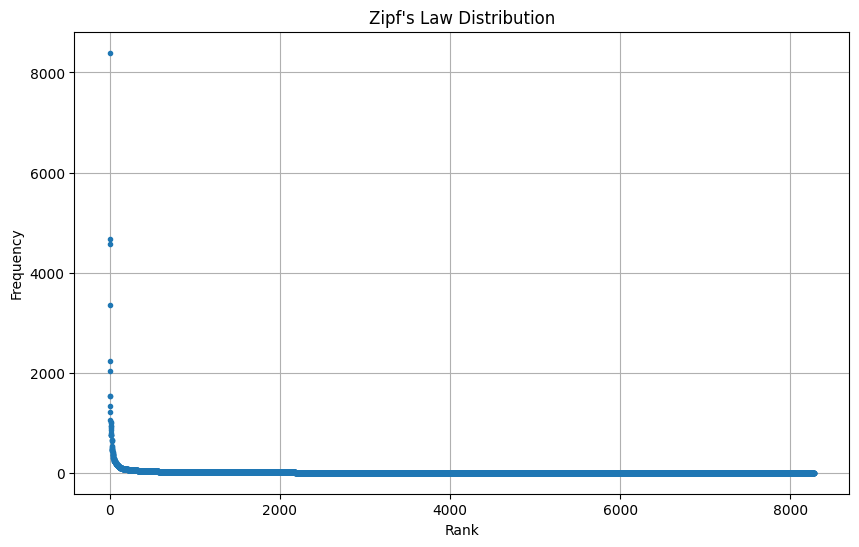

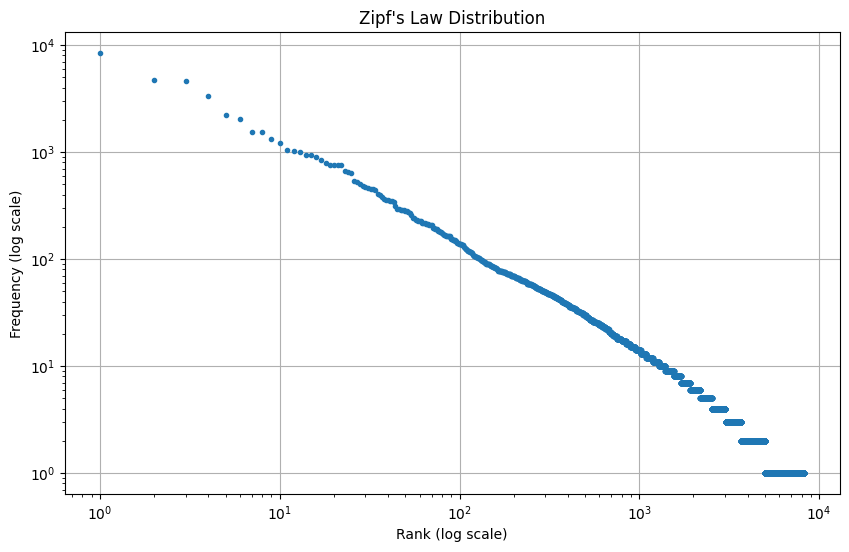

Estimated exponent 's' in Zipf's Law: 1.2431803604370886


In [134]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [135]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stop_words=stopwords.words('english')

In [137]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [138]:
print(All_words[0:20])

['Project', 'Gutenberg', 'eBook', 'History', 'United', 'States', 'America', 'Volume', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever']


In [139]:
All_fd=nltk.FreqDist(All_words)

In [140]:
All_fd

FreqDist({'Burr': 533, 'would': 478, 'Jefferson': 457, 'could': 448, 'President': 393, 'Madison': 295, 'States': 279, 'Wilkinson': 275, 'New': 253, 'government': 242, ...})

In [141]:
All_fd.most_common(100)

[('Burr', 533),
 ('would', 478),
 ('Jefferson', 457),
 ('could', 448),
 ('President', 393),
 ('Madison', 295),
 ('States', 279),
 ('Wilkinson', 275),
 ('New', 253),
 ('government', 242),
 ('Randolph', 241),
 ('United', 230),
 ('Spain', 230),
 ('Monroe', 227),
 ('one', 217),
 ('England', 215),
 ('Spanish', 206),
 ('made', 195),
 ('might', 194),
 ('British', 191),
 ('American', 181),
 ('Congress', 180),
 ('war', 173),
 ('without', 164),
 ('wrote', 153),
 ('must', 151),
 ('upon', 141),
 ('letter', 140),
 ('time', 139),
 ('said', 139),
 ('Orleans', 138),
 ('France', 136),
 ('even', 134),
 ('State', 130),
 ('first', 127),
 ('every', 127),
 ('Smith', 123),
 ('two', 121),
 ('last', 120),
 ('much', 117),
 ('public', 116),
 ('may', 114),
 ('country', 114),
 ('new', 113),
 ('General', 111),
 ('Napoleon', 108),
 ('treaty', 108),
 ('part', 105),
 ('Florida', 104),
 ('MSS', 103),
 ('Government', 102),
 ('men', 99),
 ('Armstrong', 99),
 ('taken', 98),
 ('Talleyrand', 97),
 ('order', 95),
 ('House', 

In [142]:
from wordcloud import WordCloud

In [143]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

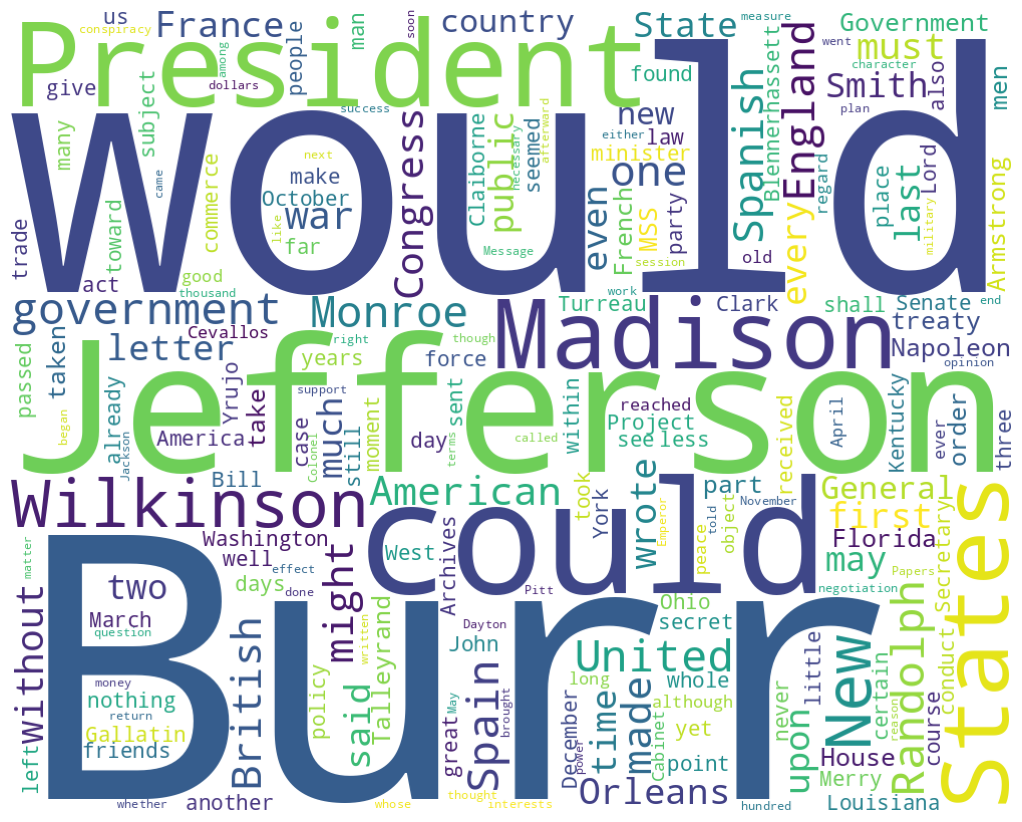

In [144]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [145]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [146]:
all_fd=nltk.FreqDist(all_words)

In [147]:
single_words=all_fd.hapaxes()

In [148]:
len(single_words)

3278

In [149]:
import random

In [150]:
random.choices(single_words,k=20)

['detect',
 'profitable',
 'congratulating',
 'pursues',
 'alludes',
 'importers',
 'simultaneously',
 'disorganized',
 'attend',
 'fiercely',
 'stature',
 'disadvantages',
 'eloquence',
 'flattering',
 'initiative',
 'soldier',
 'cela',
 'sketch',
 'hesitating',
 'bled']

In [151]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['Burr', 'would', 'Jefferson', 'could', 'President', 'Madison', 'States', 'Wilkinson', 'New', 'government']


In [152]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

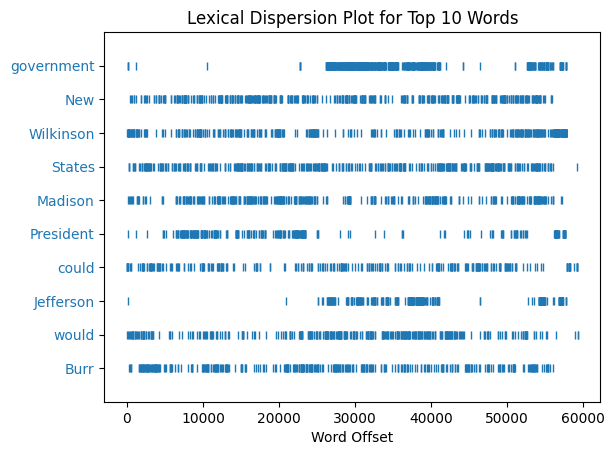

In [153]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [154]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [155]:
long_words

['inconveniences',
 'uninterrupted',
 'comprehensible',
 'unenforceability',
 'participation',
 'manufacturers',
 'inconsistencies',
 'irretrievably',
 'sensitiveness',
 'appropriations',
 'pennsylvanians',
 'remonstrances',
 'thoroughfares',
 'nonconformity',
 'extravagances',
 'qualifications',
 'republicanism',
 'filibustering',
 'parliamentary',
 'stipendiaries',
 'administration',
 'nothwithstanding',
 'corresponding',
 'pennsylvanian',
 'dissatisfactory',
 'crowninshields',
 'revolutionizing',
 'extraordinary',
 'electronically',
 'recriminations',
 'effectiveness',
 'considerations',
 'consciousness',
 'deliberations',
 'commissioners',
 'discriminating',
 'philanthropists',
 'appropriation',
 'procrastination',
 'denunciations',
 'representations',
 'conscientious',
 'discountenance',
 'apprehensions',
 'constitutionally',
 'recollections',
 'plenipotentiary',
 'electioneering',
 'international',
 'remodifications',
 'prepossessions',
 'demonstration',
 'reconciliation',
 'insu

In [156]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

18

In [157]:
print(big_words)

['administration', 'appropriation', 'blennerhassett', 'circumstances', 'commissioners', 'communication', 'communications', 'consideration', 'correspondence', 'crowninshield', 'extraordinary', 'massachusetts', 'notwithstanding', 'representatives', 'responsibility', 'thenceforward', 'understanding', 'unfortunately']


<Figure size 1200x900 with 0 Axes>

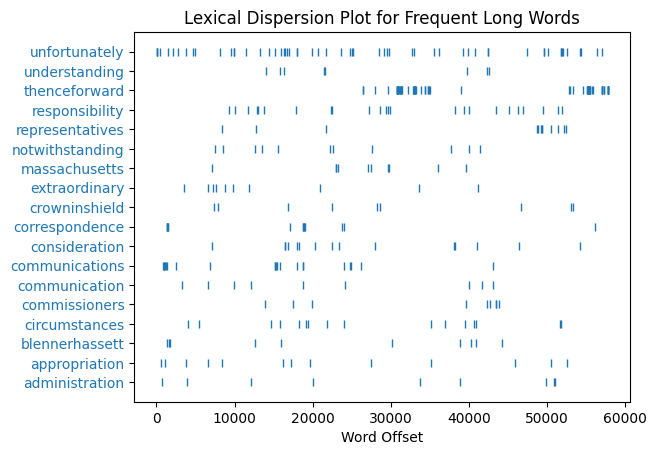

In [158]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [159]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [160]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('of', 'the'), ('to', 'the'), ('in', 'the'), ('the', 'President'), ('on', 'the'), ('to', 'be'), ('that', 'the'), ('and', 'the'), ('United', 'States'), ('with', 'the'), ('the', 'United'), ('for', 'the'), ('Burr', 's'), ('by', 'the'), ('had', 'been'), ('of', 'his'), ('from', 'the'), ('at', 'the'), ('he', 'had'), ('New', 'Orleans'), ('of', 'a'), ('that', 'he'), ('could', 'not'), ('and', 'that'), ('the', 'same'), ('and', 'to'), ('in', 'a'), ('the', 'Spanish'), ('he', 'was'), ('Jefferson', 's'), ('of', 'this'), ('would', 'be'), ('the', 'British'), ('as', 'the'), ('was', 'to'), ('have', 'been'), ('was', 'not'), ('it', 'was'), ('New', 'York'), ('of', 'Burr'), ('President', 's'), ('should', 'be'), ('to', 'his'), ('his', 'own'), ('in', 'his'), ('for', 'a'), ('all', 'the'), ('not', 'be'), ('and', 'in'), ('he', 'could'), ('could', 'be'), ('the', 'House'), ('would', 'have'), ('wrote', 'to'), ('to', 'a'), ('as', 'a'), ('did', 'not'), ('was', 'the'), ('was', 'a'), ('as', 'to'), ('but', 'the'), ('of

In [161]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('of', 'the'),
 ('to', 'the'),
 ('in', 'the'),
 ('the', 'President'),
 ('on', 'the')]

In [162]:
len(statistical_bigrams)

5

In [164]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'I')  # Replace 'your_seed_word' with your desired starting word


I have asked for the use of History replies that not located in part of 

In [165]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('the', 'United', 'States')
('of', 'the', 'United')
('the', 'President', 's')
('in', 'order', 'to')
('in', 'regard', 'to')
('of', 'Burr', 's')
('Annals', 'of', 'Congress')
('Secretary', 'of', 'State')
('could', 'not', 'be')
('the', 'Secretary', 'of')


In [166]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'The', 'only')  # Replace with your desired starting words


The only conclusion he drew his information directly from Jefferson himself Early in August Jefferson 

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [167]:
!pip install contractions
import contractions

In [ ]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [168]:
expanded_text = contractions.fix(raw)

In [169]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [170]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


"The Project Gutenberg eBook of History of the United States of America , Volume 3 ( of 9 ) This ebook is for the use of anyone anywhere in the United States and most other part of the world at no cost and with almost no restriction whatsoever . You may copy it , give it away or re-use it under the term of the Project Gutenberg License included with this ebook or online at www.gutenberg.org . If you are not located in the United States , you will have to check the law of the country where you are located before using this eBook . Title : History of the United States of America , Volume 3 ( of 9 ) During the second administration of Thomas Jefferson Author : Henry Adams Release date : January 9 , 2024 [ eBook # 72667 ] Language : English Original publication : New York : Charles Scribner 's Sons , 1889 Credits : Richard Hulse , Karin Spence and the Online Distributed Proofreading Team at http : //www.pgdp.net ( This file wa produced from image generously made available by The Internet A

In [171]:
lemmatized_text[30:200]

' History of the United States of America , Volume 3 ( of 9 ) This ebook is for the use of anyone anywhere in the United States and most other part of the world at no cost'

In [172]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [173]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [174]:
print(clean_tokens[0:100])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'History', 'of', 'the', 'United', 'States', 'of', 'America', 'Volume', 'of', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restriction', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'term', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', 'you', 'will', 'have', 'to', 'check', 'the', 'law', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', 'Title', 'History', 'of', 'the', 'United', 'States']


In [175]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [176]:
print(All_words[0:100])

['Project', 'Gutenberg', 'eBook', 'History', 'United', 'States', 'America', 'Volume', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'term', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'located', 'United', 'States', 'check', 'law', 'country', 'located', 'using', 'eBook', 'Title', 'History', 'United', 'States', 'America', 'Volume', 'second', 'administration', 'Thomas', 'Jefferson', 'Author', 'Henry', 'Adams', 'Release', 'date', 'January', 'eBook', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Charles', 'Scribner', 'Sons', 'Credits', 'Richard', 'Hulse', 'Karin', 'Spence', 'Online', 'Distributed', 'Proofreading', 'Team', 'http', 'file', 'wa', 'produced', 'image', 'generously', 'made', 'available', 'Internet', 'Libraries', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HISTORY', 'UNITED', 'STATES', 'AMERICA', 'VOLUME', 'SECOND', 'ADMINISTRATION', '

In [177]:
All_fd=nltk.FreqDist(All_words)

In [178]:
All_fd

FreqDist({'wa': 1535, 'Burr': 536, 'would': 480, 'Jefferson': 457, 'could': 448, 'President': 393, 'Madison': 296, 'States': 283, 'Wilkinson': 275, 'government': 256, ...})

In [179]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

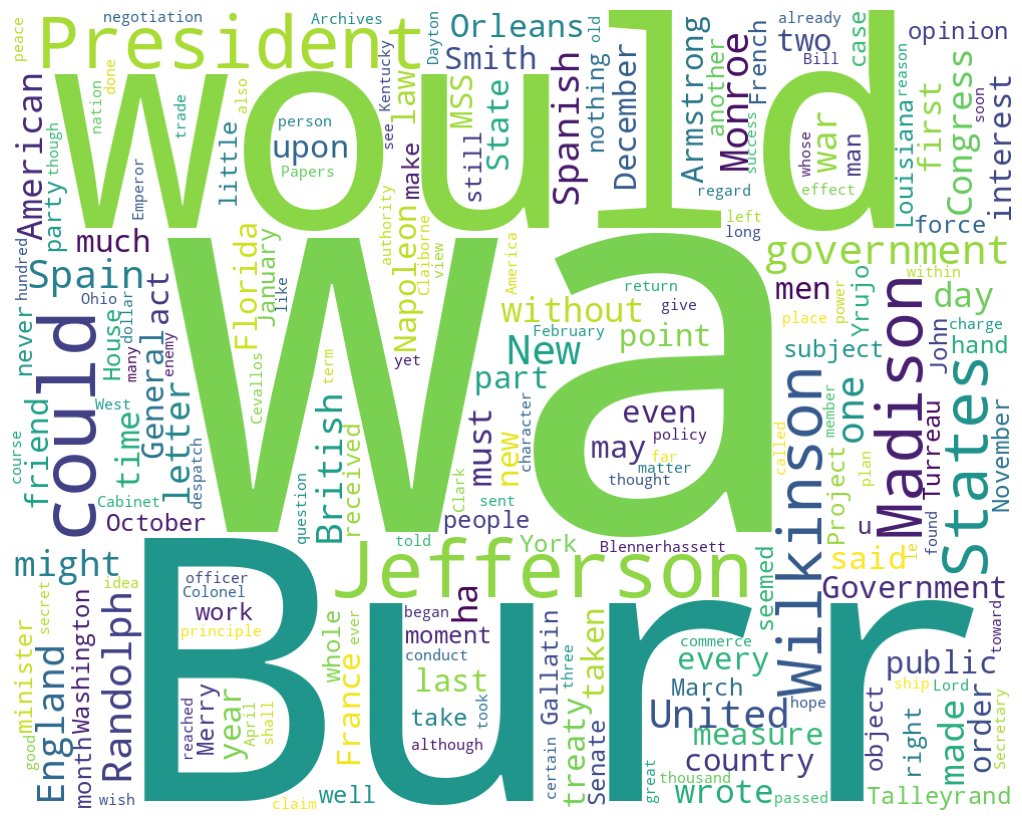

In [180]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [181]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['wa', 'Burr', 'would', 'Jefferson', 'could', 'President', 'Madison', 'States', 'Wilkinson', 'government']


<Figure size 1200x900 with 0 Axes>

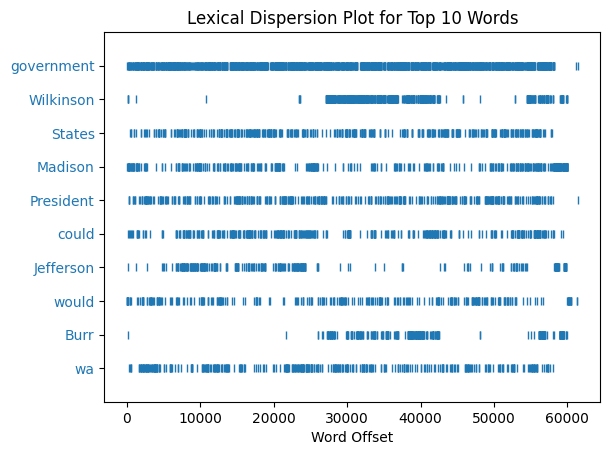

In [182]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()